<center><h1><b>Lecture 3</b></h1></center>
<center><h1><b>Random Walks and Stochastic Programs</b></h1></center>

<center><h4>Time: T2 (09:00 ~ 09:50) and R78 (15:30 ~ 17:20)</h4></center>

<center><h2>Chieh-En Lee<sup>1</sup> (李杰恩) and Chung-Hao Tien<sup>2</sup> (田仲豪)</h2></center>

<center>
<h4>{<a href="mailto:celee@nycu.edu.tw">celee</a><sup>1</sup>, 
<a href="mailto:chtien@nycu.edu.tw">chtien</a><sup>2</sup>}@nycu.edu.tw</h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs_advanced">Data Science and Python Programming</a>, 2024 Spring</h5></center>


## Last Time

- Graph theory
- Graph optimization problems
- Breadth-first search
- Depth-first search
- Dijkstra algorithm

## **Today**

<ul>
  <li>
    Part I: Random Walk
    <ul>
      <li><a href="#tag1">Random walks</a></li>
      <li><a href="#tag2">The drunkard's walk</a></li>
      <li><a href="#tag3">Biased random walks</a></li>
      <li><a href="#tag4">Treacherous fields</a></li>
    </ul>
  </li>

  <li>
    Part II: Stochastic Programs
    <ul>
      <li><a href="#tag5">Stochastic programs</a></li>
      <li><a href="#tag6">Inferential statistics</a></li>
      <li><a href="#tag7">Distributions</a></li>
      <li><a href="#tag8">Simulation of more practical cases</a></li>
    </ul>
  </li>
  
</ul>


<a id="tag1"></a>

## **Random Walks**

- In 1827, the Scottish botanist Robert Brown observed that pollen particles suspended in water seemed to float around at random.

- Random walks are widely used to model many different processes:

    * Physical processes (e.g., diffusion)
    
    * Biological processes (e.g., the kinetics of displacement of RNA from heteroduplexes by DNA)
    
    * Social processess (e.g., movements of the stock market)

- It provides us with a good example of how to use abstract data types and inheritance to structure programs in general and simulation models in particular.




<a id="tag2"></a>

## **The Drunkard's Walk**

- A drunkard is standing in the middle of a field.

- Every second the drunkard takes one step in a random direction.

- What is his/her expected distance from the origin in 1000 seconds?

- If he/she takes many steps, is he/she likely to move ever farther from the origin or not?

    <img align="center" height=auto width=200px src="./assets/fig1.png">

- Run the scripts:

```bash
python main_Lecture03.py --num 1
python main_Lecture03.py --num 2
```


<a id="tag3"></a>

## **Biased Random Walks**

- A drunkard with special behavior

- For example:

    * A drunkard in the southern hemisphere who hates the heat is able to move twice as fast when his random movements take him in a southward direction, even in his drunken stupor.

    * A TSMC employee who lives in the western coast of Taiwan wants to run away from his company. After drinking heavily, he is able to move twice as fast when his random movements take him in a eastward direction.

    * ...

    <img align="center" height=auto width=400px src="./assets/fig2.png">


- Run the scripts:

```bash
python main_Lecture03.py --num 3
python main_Lecture03.py --num 4
```


#### Get the Final Location

- Run the scripts:

```bash
python main_Lecture03.py --num 5
```

#### Iterator

- If you are not familiar with this, please refer [here](https://github.com/bruce88617/nycudopcs/blob/928926d9710ed209171dc26896906f12cb8acc45/Lectures/Lecture08/Lecture8.ipynb).

- Sample code:

    ```python
    class styleIterator:
        def __init__(self, styles):
            self.index = 0
            self.styles = styles
        
        def nextStyle(self):
            result = self.styles[self.index]
            if self.index == len(self.styles)-1:
                self.index = 0
            else:
                self.index += 1
            return result
    ```




#### The Trajectory of Walks

- Run the scripts:

```bash
python main_Lecture03.py --num 6
```

<a id="tag4"></a>

## **Treacherous fields**

- A field with wormholes

- For example:

    <img align="center" height=auto width=300px src="./assets/fig3.png">

- Run the scripts:

```bash
python main_Lecture03.py --num 7
```

<a id="tag5"></a>

## **Stochastic Programs**

- A program is __**deterministic**__ if whenever it is run on the same input, it produces the same output.

- If there is a program that is designed to simulate a dice game somewhere, it requires a __**stochastic**__ implementation, otherwise it is a boring game.

- Most programming languages, including Python, include simple ways to write stochastic programs, i.e., programs that exploit randomness.

- Typically, a random number or a series of random bits is created via **pseudo random number generator** (PRNG), which generates random number (or bit) based on an initial value called __**seed**__.

    <img align="center" height=auto width=200px src="./assets/fig4.png">

- Run the script:

```bash
python main_Lecture03.py -part 2 --num 1
```


In [1]:
from scripts.part2 import test1

# Random seed
test1()

# Fixed random see
test1(seed=True)

Rolling a fair dice 5 times
    1 trials: 11461
    2 trials: 15146
    3 trials: 46326
    4 trials: 35335
    5 trials: 26614
Rolling a fair dice 5 times
    1 trials: 44135
    2 trials: 44135
    3 trials: 44135
    4 trials: 44135
    5 trials: 44135


<a id="tag6"></a>

## **Inferential Statistics**

- We can use a systematic process to derive the precise probability of some complex event based on knowing the probability of one or more simpler events.

- However, we don’t actually know the exact probability of a event (we don’t know whether the dice is fair, for example).

- Fortunately, if we have some data about the behavior of the dice, we can combine that data with our knowledge of probability to derive an estimate of the true probability. This concept is called __**inferential statistics**__.

#### Flip a Fair Coin

- Suppose you are playing a coin flip game with Harvey Dent, and if heads comes up, Harvey wins. What is the probability that Harvey wins?

    <img align="center" height=auto width=500px src="./assets/fig5.png">

- Run the script:

```bash
python main_Lecture03.py -part 2 --num 2
```


In [1]:
from scripts.part2.testFuncs import test2

# 1
test2(numFlipsPerTrial=10, numTrials=1, numExps=5)
print("="*50)

# 2
test2(numFlipsPerTrial=10, numTrials=10, numExps=5)
print("="*50)

# 3
test2(numFlipsPerTrial=10, numTrials=100, numExps=5)
print("="*50)

Flipping a fair coin 10 times
    1 Experiment: Mean = 0.500
    2 Experiment: Mean = 0.500
    3 Experiment: Mean = 0.300
    4 Experiment: Mean = 0.600
    5 Experiment: Mean = 0.500
Flipping a fair coin 10 times
    1 Experiment: Mean = 0.520
    2 Experiment: Mean = 0.490
    3 Experiment: Mean = 0.500
    4 Experiment: Mean = 0.560
    5 Experiment: Mean = 0.410
Flipping a fair coin 10 times
    1 Experiment: Mean = 0.484
    2 Experiment: Mean = 0.523
    3 Experiment: Mean = 0.498
    4 Experiment: Mean = 0.513
    5 Experiment: Mean = 0.522


#### Law of Large Numbers

- If we repeat a test with the same actual probability $p$ of a particular outcome independently, the chance that the fraction of times that outcome occurs differs from $p$ converges to $0$ as the number of trials goes to infinity.

- However, it is worth noting that this law does not imply that if deviations from expected behavior occur, these deviations are likely to be “evened out” by opposite deviations in the future.

- Run the scripts:

```bash
python main_Lecture03.py -part 2 --num 3
python main_Lecture03.py -part 2 --num 4
```

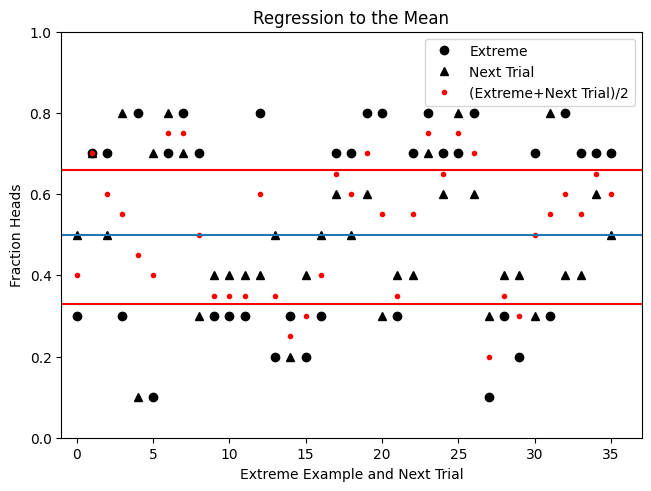

In [1]:
from scripts.part2.testFuncs import test3

test3(numFlipsPerTrial=10, numTrials=100)

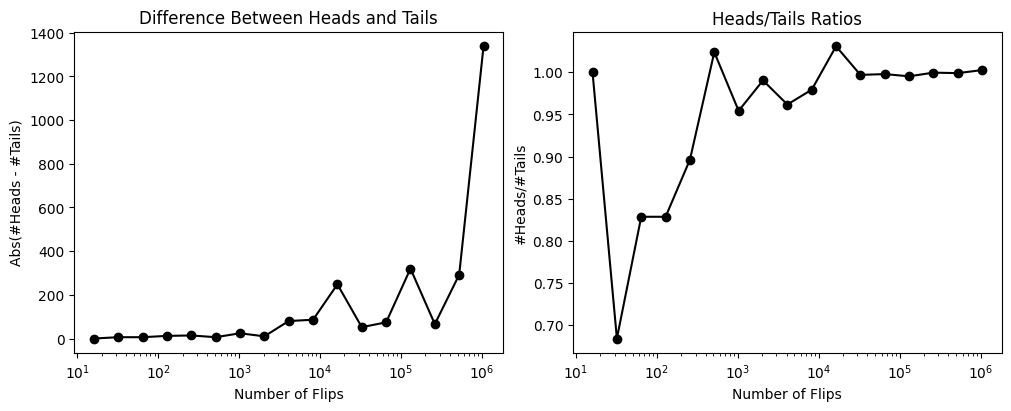

In [2]:
from scripts.part2.testFuncs import test4

test4(minExp=4, maxExp=20)

#### Variance and Standard Deviation

- It is impossible to achieve perfect accuracy through sampling without sampling the entire population.

- How many samples do we need to look at before we can have justified confidence in our answer? 

    * This depends on the **variance** in the underlying distribution.

$$
\text{variance}(X) = \frac{1}{\color{#FFF200} N} \sum_{i=1}^{N}{(x_i - \mu)^2}
$$

- The **standard deviation** contains exactly the same information as the variance but is easier to interpret because it is in the same units as the original data.

    * The mean height of Taiwanese male is $173 cm$ with standard deviation $5.5 cm$.  
    * The mean height of Taiwanese male is $173 cm$ with variance $30.25 cm^2$.

- Run the script:

```bash
python main_Lecture03.py -part 2 --num 5
```

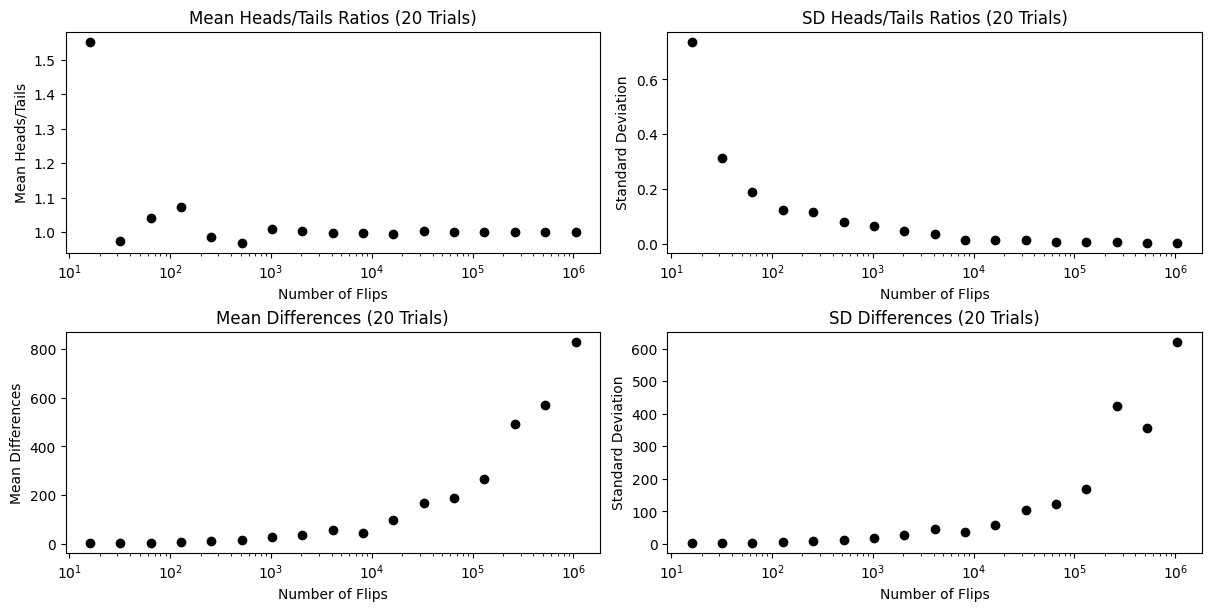

In [1]:
from scripts.part2.testFuncs import test5

test5(minExp=4, maxExp=20, numTrials=20)

#### Coefficient of Variation

- When comparing data sets with different means, the **coefficient of variation** is often more informative than the standard deviation.

- Definition

$$
\text{Coefficient of variation}(X) = \frac{\text{Standard deviation}(X)}{\text{Mean}(X)}
$$

- Run the script:

```bash
python main_Lecture03.py -part 2 --num 6
```

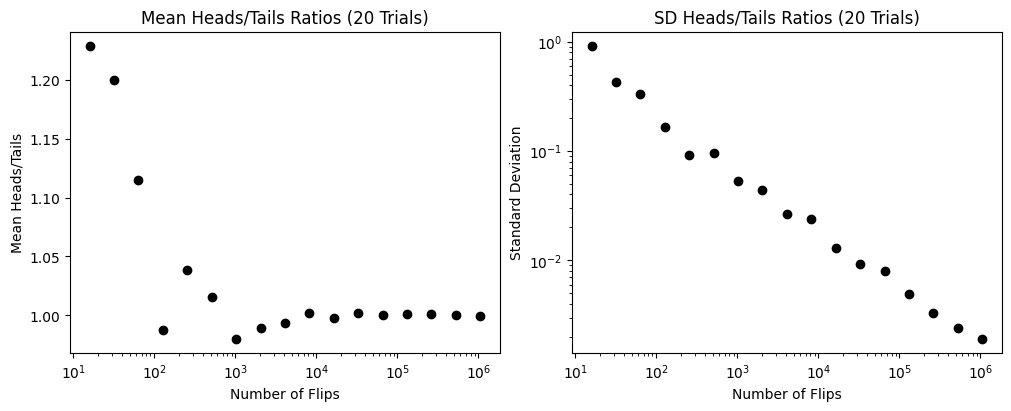

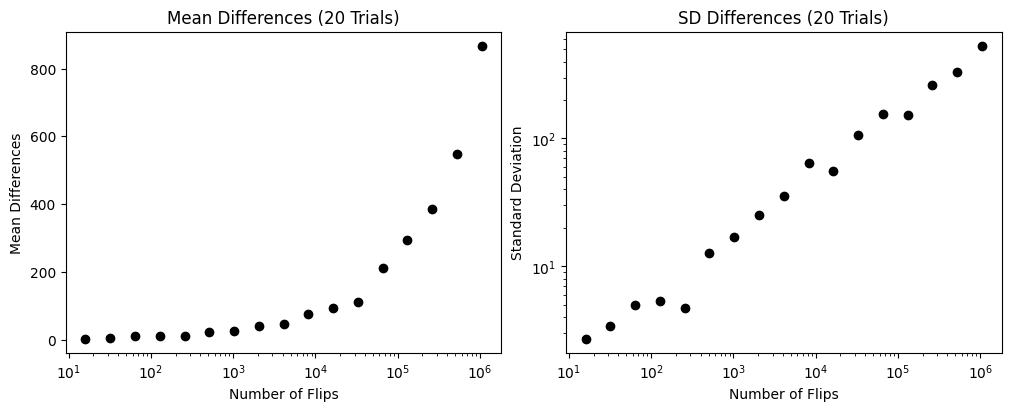

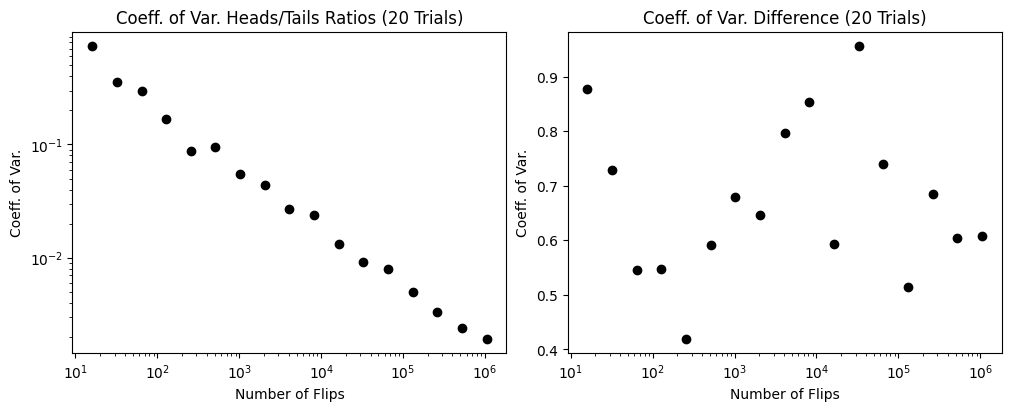

In [2]:
from scripts.part2.testFuncs import test6

test6(minExp=4, maxExp=20, numTrials=20)

<a id="tag7"></a>

## **Distributions**

- A **histogram** is a plot designed to show the distribution of values in a set of data.

- Discrete random variable and discrete probability distributions

- Continuous random variable and continuous probability distributions

- Probability density function (PDF) describes the probability of a random variable lying between two values.

- Run the script:

```bash
python main_Lecture03.py --p 2 --num 7
```

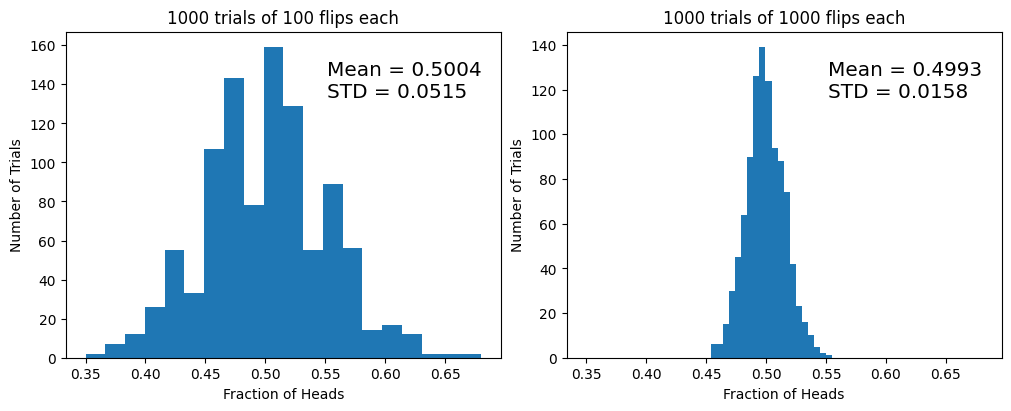

In [3]:
from scripts.part2.testFuncs import test7

test7(numFlips1=100, numFlips2=1000, numTrials=1000)

#### Normal distribution

- A **normal** (or **Gaussian**) **distribution** is defined by the probability density function:

$$
P(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

- A **confidence interval** provides a range that is likely to contain the unknown value and a degree of confidence that the unknown value lies within the range.

- For example, a political poll might indicate that a candidate is likely to get $87 \%$ of the vote $\pm 3 \%$ with a **confidence level** of $95 \%$.

    * The size of confidence interval is $6$.

    * The pollster believes that $\color{#FFF200} 95 \%$ of the time the candidate will receive between $\color{#FFF200} 84 \%$ and $\color{#FFF200} 90 \%$ of the vote.

- Run the script:

```bash
python main_Lecture03.py --p 2 --num 8
```

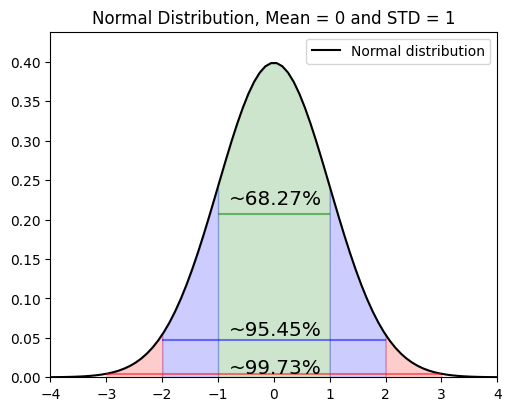

In [4]:
from scripts.part2.testFuncs import test8

test8(x=None, mu=0, sigma=1, N=100)

In [5]:
from scripts.part2.utils import checkEmpirical

checkEmpirical(3)

Normal distribution with (μ, σ) = (1, 5)
    Area within 1 std = 0.6827
    Area within 2 std = 0.9545
    Area within 3 std = 0.9973
Normal distribution with (μ, σ) = (-1, 5)
    Area within 1 std = 0.6827
    Area within 2 std = 0.9545
    Area within 3 std = 0.9973
Normal distribution with (μ, σ) = (-3, 9)
    Area within 1 std = 0.6827
    Area within 2 std = 0.9545
    Area within 3 std = 0.9973


##### Estimate with Error Bars

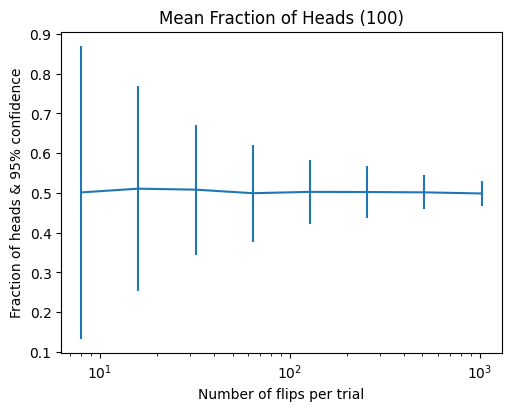

In [6]:
from scripts.part2.testFuncs import test9

test9(minExp=3, maxExp=10, numTrials=100)

#### Binomial and Multinomial Distributions

- Random variables that can take on only a discrete set of values are called **categorical** (also **nominal** or **discrete**) variables.

- When a categorical variable has only two possible values, the probability distribution is called **binomial distribution**.

- If the probability of a success in a single trial is $p$, the probability of exactly $k$ successes in $n$ independent trials is

$$
\binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
$$

- For example, rolling two 3's:



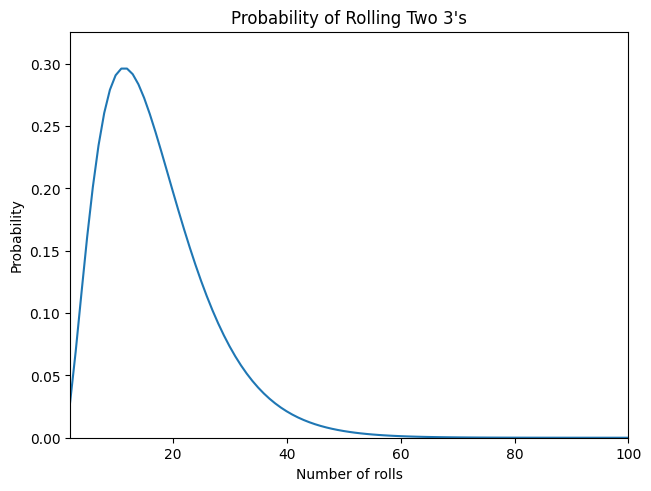

In [7]:
from scripts.part2.testFuncs import test10

test10(minExp=2, maxExp=100, p=1/6, times=2)

##### Exercise

- 假設成功要到聯絡資訊的機率是 $5 \%$，請問 OOO 搭訕到第幾個人時拿到 $10$ 個的聯絡資訊的機率最大？

<img align="center" height=auto width=500px src="./assets/fig6.png">

#### Exponential and Geometric Distributions

- Exponential distribution:

$$
P(x) = \lambda \cdot e^{-\lambda x}
$$

- The **geometric distribution** is the discrete analog of the exponential distribution. It is usually thought of as describing the number of independent attempts required to achieve a first success (or a first failure).


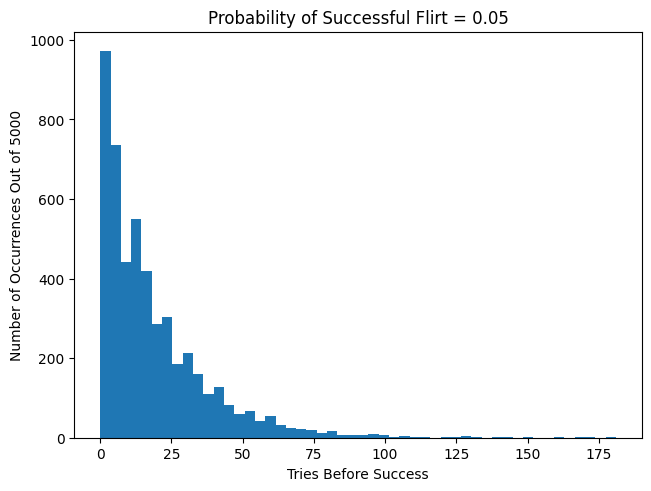

In [8]:
import random
import matplotlib.pyplot as plt

def successfulFlirt(successProb=0.05, numTrials=5000):
    triesBeforeSuccess = []
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > successProb:
            consecFailures += 1
        triesBeforeSuccess.append(consecFailures)
    
    fig = plt.figure(dpi=100, layout="constrained")
    ax = fig.add_subplot(111)
    ax.hist(triesBeforeSuccess, bins=50)
    ax.set_title("Probability of Successful Flirt = {:0.2f}".format(successProb))
    ax.set_xlabel("Tries Before Success")
    ax.set_ylabel("Number of Occurrences Out of {}".format(numTrials))

successfulFlirt()

<a id="tag8"></a>

## **Simulation of more practical cases**

#### Exercise: Best of 7

- Modern competitive sports is an important entertainment in people's life. Many professional sports events are held around the world and boost tremendous economic growth. One of the biggest professional leagues is the Major League Baseball. Almost every October (or November, sometimes) two teams from the Major League Baseball meet each other in something called the World Series. They play each other repeatedly until one of the teams has won four games to claim the title of "world champion."

- In this exercise, we are going to simulate a classic question: **how often does the better team win?**

- Let's say we have team A and team B meeting each other in the World Series 2023, and we have done all the background check on both teams before the game. The probability that team A wins a game is $p$. What is the probability that team A or team B will win the series?

    <img align="center" height=auto width=500px src="./assets/fig7.png">



<details><summary>Click here for solution</summary>

```python
import random
import matplotlib.pyplot as plt

def playSeries(numGames, teamProb):
    numWon, numLost = 0, 0
    for game in range(numGames):
        if random.random() <= teamProb:
            numWon += 1
        else:
            numLost += 1
        if (numWon == numGames//2+1) or (numLost == numGames//2+1):
            break
    return (numWon, numLost, numWon>numLost)

def simSeries(prob=0.5, numSeries=100):
    result = {
        (4,0):0, (4,1):0, (4,2):0, (4,3):0,
        (3,4):0, (2,4):0, (1,4):0, (0,4):0,
    }
    A, B = 0, 0

    for i in range(numSeries):
        W, L, win = playSeries(7, prob)
        result[(W,L)] += 1
            
        if win:
            A += 1
        else:
            B += 1
        
    result_list = []
    xVals = []
    for key in result.keys():
        result_list.append(result[key])
        xVals.append(str(key))

    fig = plt.figure(figsize=(5,4), dpi=100, layout="constrained")
    ax = fig.add_subplot(111)
    ax.bar(xVals[:4], result_list[:4], width=0.5, color="b", label="Probability of A won = {:02d}%".format(A))
    ax.bar(xVals[4:], result_list[4:], width=0.5, color="r", label="Probability of B won = {:02d}%".format(B))
    ax.set_title("{} Seven-Game Series".format(numSeries))
    ax.set_xlabel("Result")
    ax.set_ylabel("Number of Occurrences Out of {}".format(numSeries))
    ax.legend(loc="best")

    plt.show()
    
simSeries(0.6)

    ```

</details>

<details><summary>Appendix</summary>

#### Exercise: Quantile-Quantile Plot (QQ plot)

- A method to identify whether two probability distributions are the same.

    1. Calculate the **cumulative density function (CDF)** of these two distributions.

    2. Plot the quantiles of these two distributions.

- How do we calculate the **cumulative density function (CDF)**?



</details>